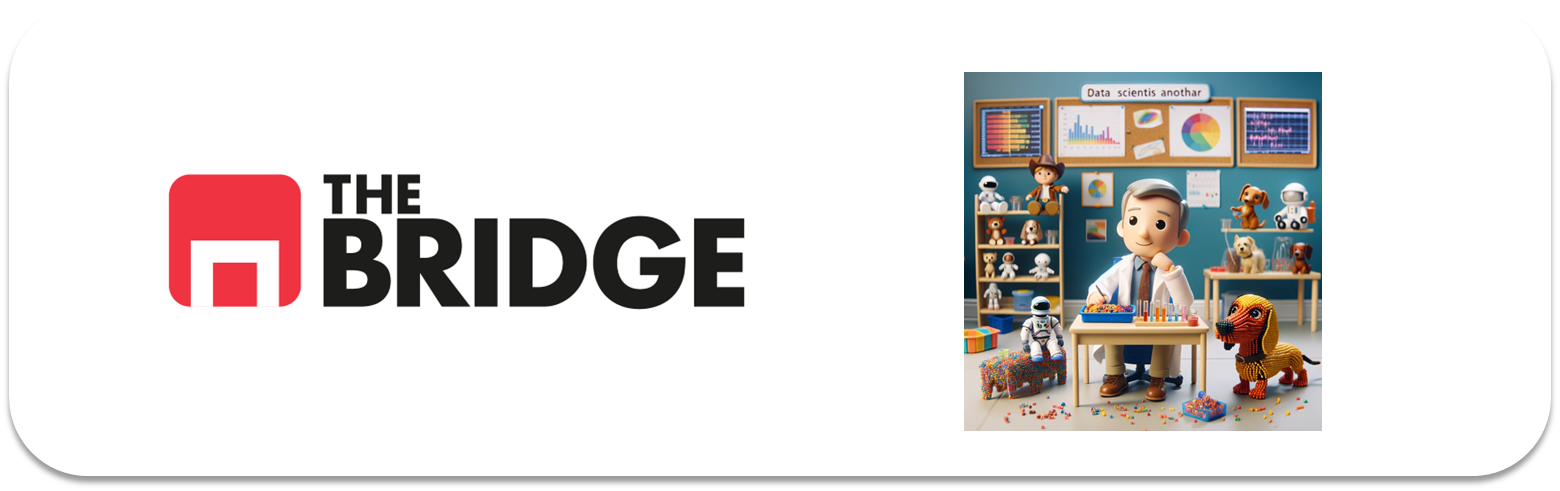

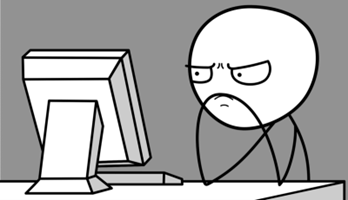

Para ejercitarte y afianzar lo aprendido sobre tendencias centrales, frecuencias, medidas de posición y rangos, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos se subirá a lo largo del sprint.

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [13]:

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Ejercicio 1

Carga en un dataframe los datos contenidos en la ruta "./data/admission_data.csv", muestra un parte de su contenido y la info general del mismo

In [4]:
df = pd.read_csv("/Users/feeelfree/Desktop/Miguel/DATA/bootcamp/ONLINE_DS_THEBRIDGE_MMONTUENGA/SPRINT7/TRABAJOS/admission_data.csv",index_col="Unnamed: 0")
df

,Year,Major,Gender,Admission
0,1973,School of Medicine,F,Rejected
1,1973,Department of Economics,M,Accepted
2,1973,Other,F,Accepted
3,1973,Other,M,Accepted
4,1973,Other,M,Rejected
...,...,...,...,...
12758,1973,Other,M,Accepted
12759,1973,Department of Mechanical Engineering,M,Accepted
12760,1973,Other,F,Rejected
12761,1973,Other,M,Rejected


### Ejercicio 2

Como ya sabes este dataset queremos analizarlo para poder estudiar la posible discriminación en las admisiones de los departamentos universitarios. Analiza la variable `Year`, ¿qué crees que deberíamos hacer con esta variable?

In [10]:
columnas=df.columns.tolist()
columnas

df.Year=pd.to_datetime(df.Year)
df['Year'] = df['Year'].dt.strftime('%Y')
df.Year


0        1970
1        1970
2        1970
3        1970
4        1970
         ... 
12758    1970
12759    1970
12760    1970
12761    1970
12762    1970
Name: Year, Length: 12763, dtype: object

### Ejercicio 3

Analiza ahora la columna `Major`, obtén las frecuencias absolutas y relativas de forma numérica y de forma gráfica. Puedes emplear las funciones del notebook de visualizaciones del repo o bien la función `pinta_distribucion_categoricas` del módulo `bootcampviztools` y que hemos usado en el workout. (Tiene un argumento `relativa` para mostrar las frecuencias relativas y otro `mostrar_valores` para enseñar las etiquetas de los valores).

In [21]:

def pinta_distribucion_categoricas(df, columnas_categoricas, relativa=False, mostrar_valores=False):
    num_columnas = len(columnas_categoricas)
    num_filas = (num_columnas // 2) + (num_columnas % 2)

    fig, axes = plt.subplots(num_filas, 2, figsize=(15, 5 * num_filas))
    axes = axes.flatten() 

    for i, col in enumerate(columnas_categoricas):
        ax = axes[i]
        if relativa:
            total = df[col].value_counts().sum()
            serie = df[col].value_counts().apply(lambda x: x / total)
            sns.barplot(x=serie.index, y=serie, ax=ax, palette='viridis', hue = serie.index, legend = False)
            ax.set_ylabel('Frecuencia Relativa')
        else:
            serie = df[col].value_counts()
            sns.barplot(x=serie.index, y=serie, ax=ax, palette='viridis', hue = serie.index, legend = False)
            ax.set_ylabel('Frecuencia')

        ax.set_title(f'Distribución de {col}')
        ax.set_xlabel('')
        ax.tick_params(axis='x', rotation=45)

        if mostrar_valores:
            for p in ax.patches:
                height = p.get_height()
                ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), 
                            ha='center', va='center', xytext=(0, 9), textcoords='offset points')

    for j in range(i + 1, num_filas * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()


columnas_categoricas=df.columns.tolist()

In [20]:
df.Major.value_counts(True)

Major
Other                                                      0.620857
Department of Physics and Astronomy                        0.097626
School of Medicine                                         0.071927
Department of Mechanical Engineering                       0.062054
Department of Psychology                                   0.055943
Department of Economics                                    0.045836
School of Political Science and International Relations    0.045757
Name: proportion, dtype: float64

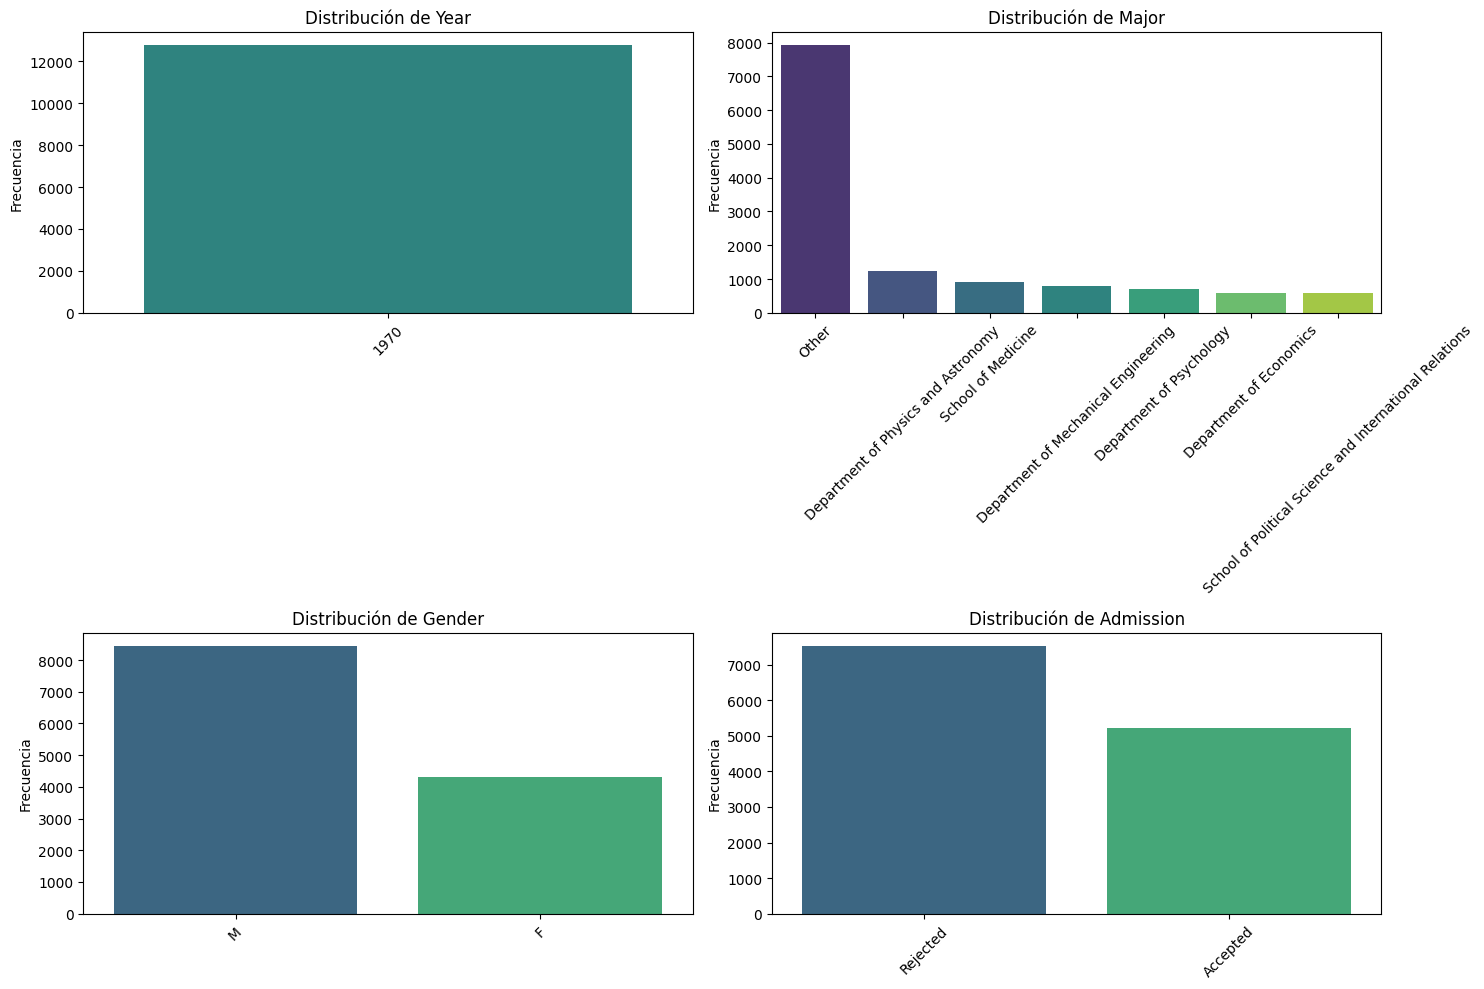

In [22]:
pinta_distribucion_categoricas(df,columnas_categoricas)

### Ejercicio 4

¿Qué puedes comentar de los datos anteriores?

### Ejercicio 5

Analiza ahora la columna `Gender`, obtén las frecuencias absolutas y relativas de forma numérica y de forma gráfica. 

In [23]:
df.Gender.value_counts(True)

Gender
M    0.661443
F    0.338557
Name: proportion, dtype: float64

### Ejercicio 6

¿Qué puedes comentar de los datos anteriores?

### Ejercicio 7

Finalmente analiza, la columna `Admission`, obtén las frecuencias absolutas y relativas de forma numérica y de forma gráfica. 

In [24]:
df.Admission.value_counts(True)

Admission
Rejected    0.590065
Accepted    0.409935
Name: proportion, dtype: float64

### Ejercicio 8

¿Qué puedes comentar de los datos anteriores?

### Ejercicio 9

Carga en un dataframe los datos contenidos en la ruta "./data/tips.csv", muestra un parte de su contenido y la info general del mismo

In [31]:
df_tips = pd.read_csv("/Users/feeelfree/Desktop/Miguel/DATA/bootcamp/ONLINE_DS_THEBRIDGE_MMONTUENGA/SPRINT7/TRABAJOS/tips.csv",index_col="Unnamed: 0")
df_tips_columnas=df_tips.columns.tolist()
for x in df_tips_columnas:
    print(df_tips[x].value_counts(True))

total_bill
13.42    0.012295
13.81    0.008197
15.98    0.008197
17.92    0.008197
10.07    0.008197
           ...   
24.71    0.004098
21.16    0.004098
28.97    0.004098
22.49    0.004098
18.78    0.004098
Name: proportion, Length: 229, dtype: float64
tip
2.00    0.135246
3.00    0.094262
4.00    0.049180
5.00    0.040984
2.50    0.040984
          ...   
4.34    0.004098
1.56    0.004098
5.20    0.004098
2.60    0.004098
1.75    0.004098
Name: proportion, Length: 123, dtype: float64
sex
Male      0.643443
Female    0.356557
Name: proportion, dtype: float64
smoker
No     0.618852
Yes    0.381148
Name: proportion, dtype: float64
day
Sat     0.356557
Sun     0.311475
Thur    0.254098
Fri     0.077869
Name: proportion, dtype: float64
time
Dinner    0.721311
Lunch     0.278689
Name: proportion, dtype: float64
size
2    0.639344
3    0.155738
4    0.151639
5    0.020492
1    0.016393
6    0.016393
Name: proportion, dtype: float64


### Ejercicio 10

Vamos a analizar las medidas de tendencia central (media, mediana), las de posición (los cuartiles) y los rangos de las variables numéricas del dataset. Muestra esos valores para todas las variables numéricas del dataset.

In [32]:
df_tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


### Ejercicio 11

Para completar el análisis incial de las variables numéricas, muestra el diagrama de caja (*boxplot*) para cada una de las variables numéricas del dataset. ¿Qué puedes decir de ellas? (Puedes emplear las funciones incluidas en el notebook de visualizaciones sencillas o la función `plot_multiple_boxplots` de `bootcampviztools`, y que hemos empleado en el workout)

In [33]:

def plot_multiple_boxplots(df, columns, dim_matriz_visual = 2):
    num_cols = len(columns)
    num_rows = num_cols // dim_matriz_visual + num_cols % dim_matriz_visual
    fig, axes = plt.subplots(num_rows, dim_matriz_visual, figsize=(12, 6 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        if df[column].dtype in ['int64', 'float64']:
            sns.boxplot(data=df, x=column, ax=axes[i])
            axes[i].set_title(column)

    # Ocultar ejes vacíos
    for j in range(i+1, num_rows * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

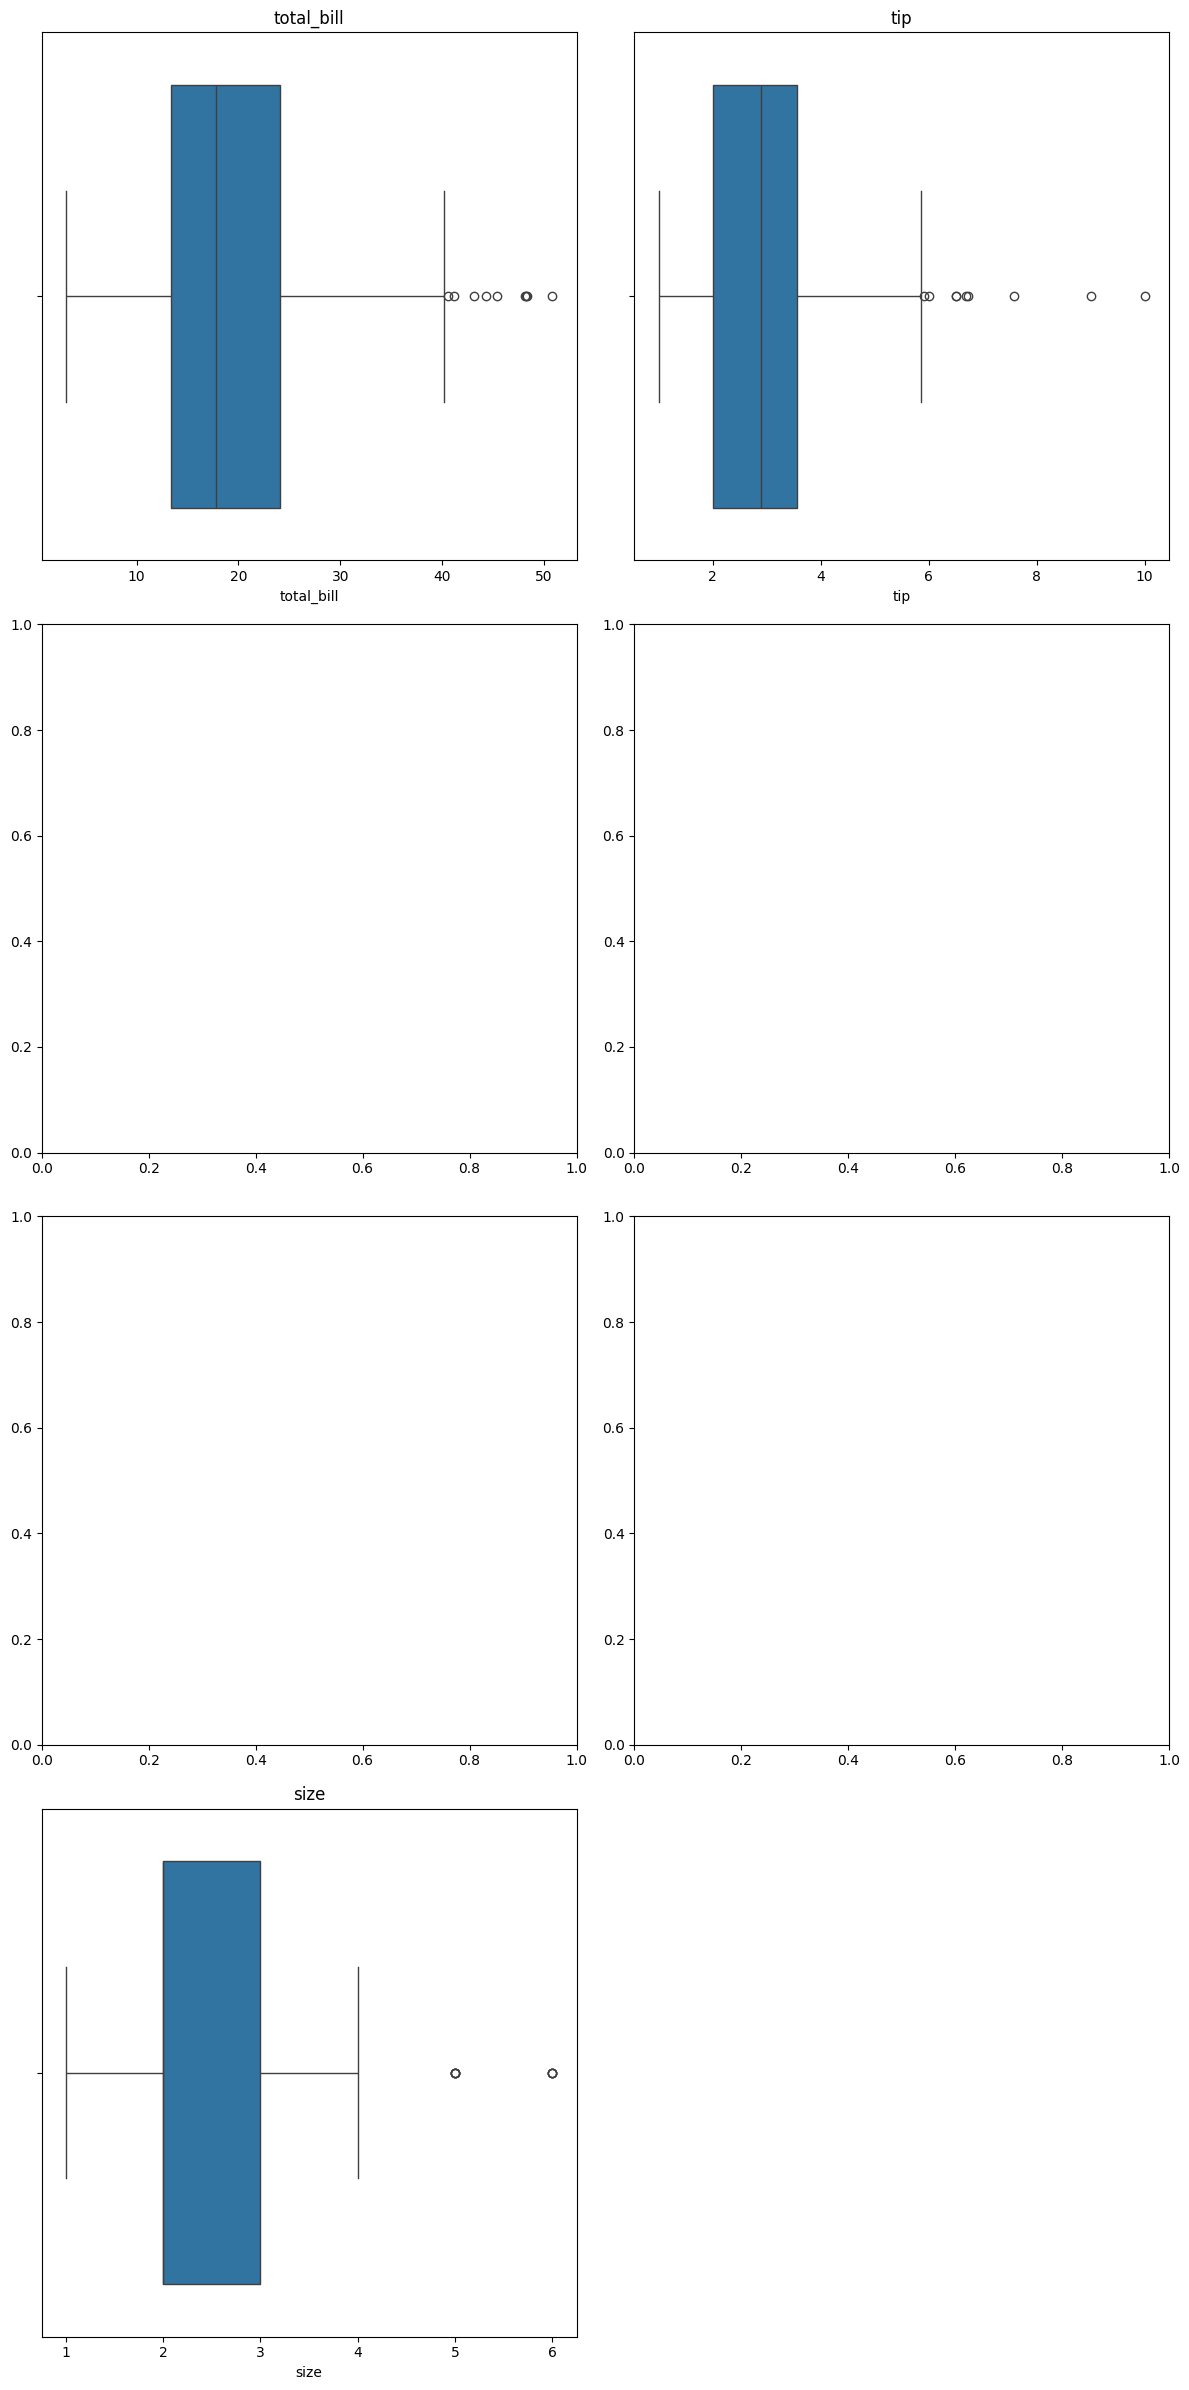

In [34]:
plot_multiple_boxplots(df_tips,df_tips_columnas)

### Ejercicio Extra #1:

Muestra las frecuencias absolutas y relativas de las variables categóricas del dataset. ¿Qué podrías destacar?

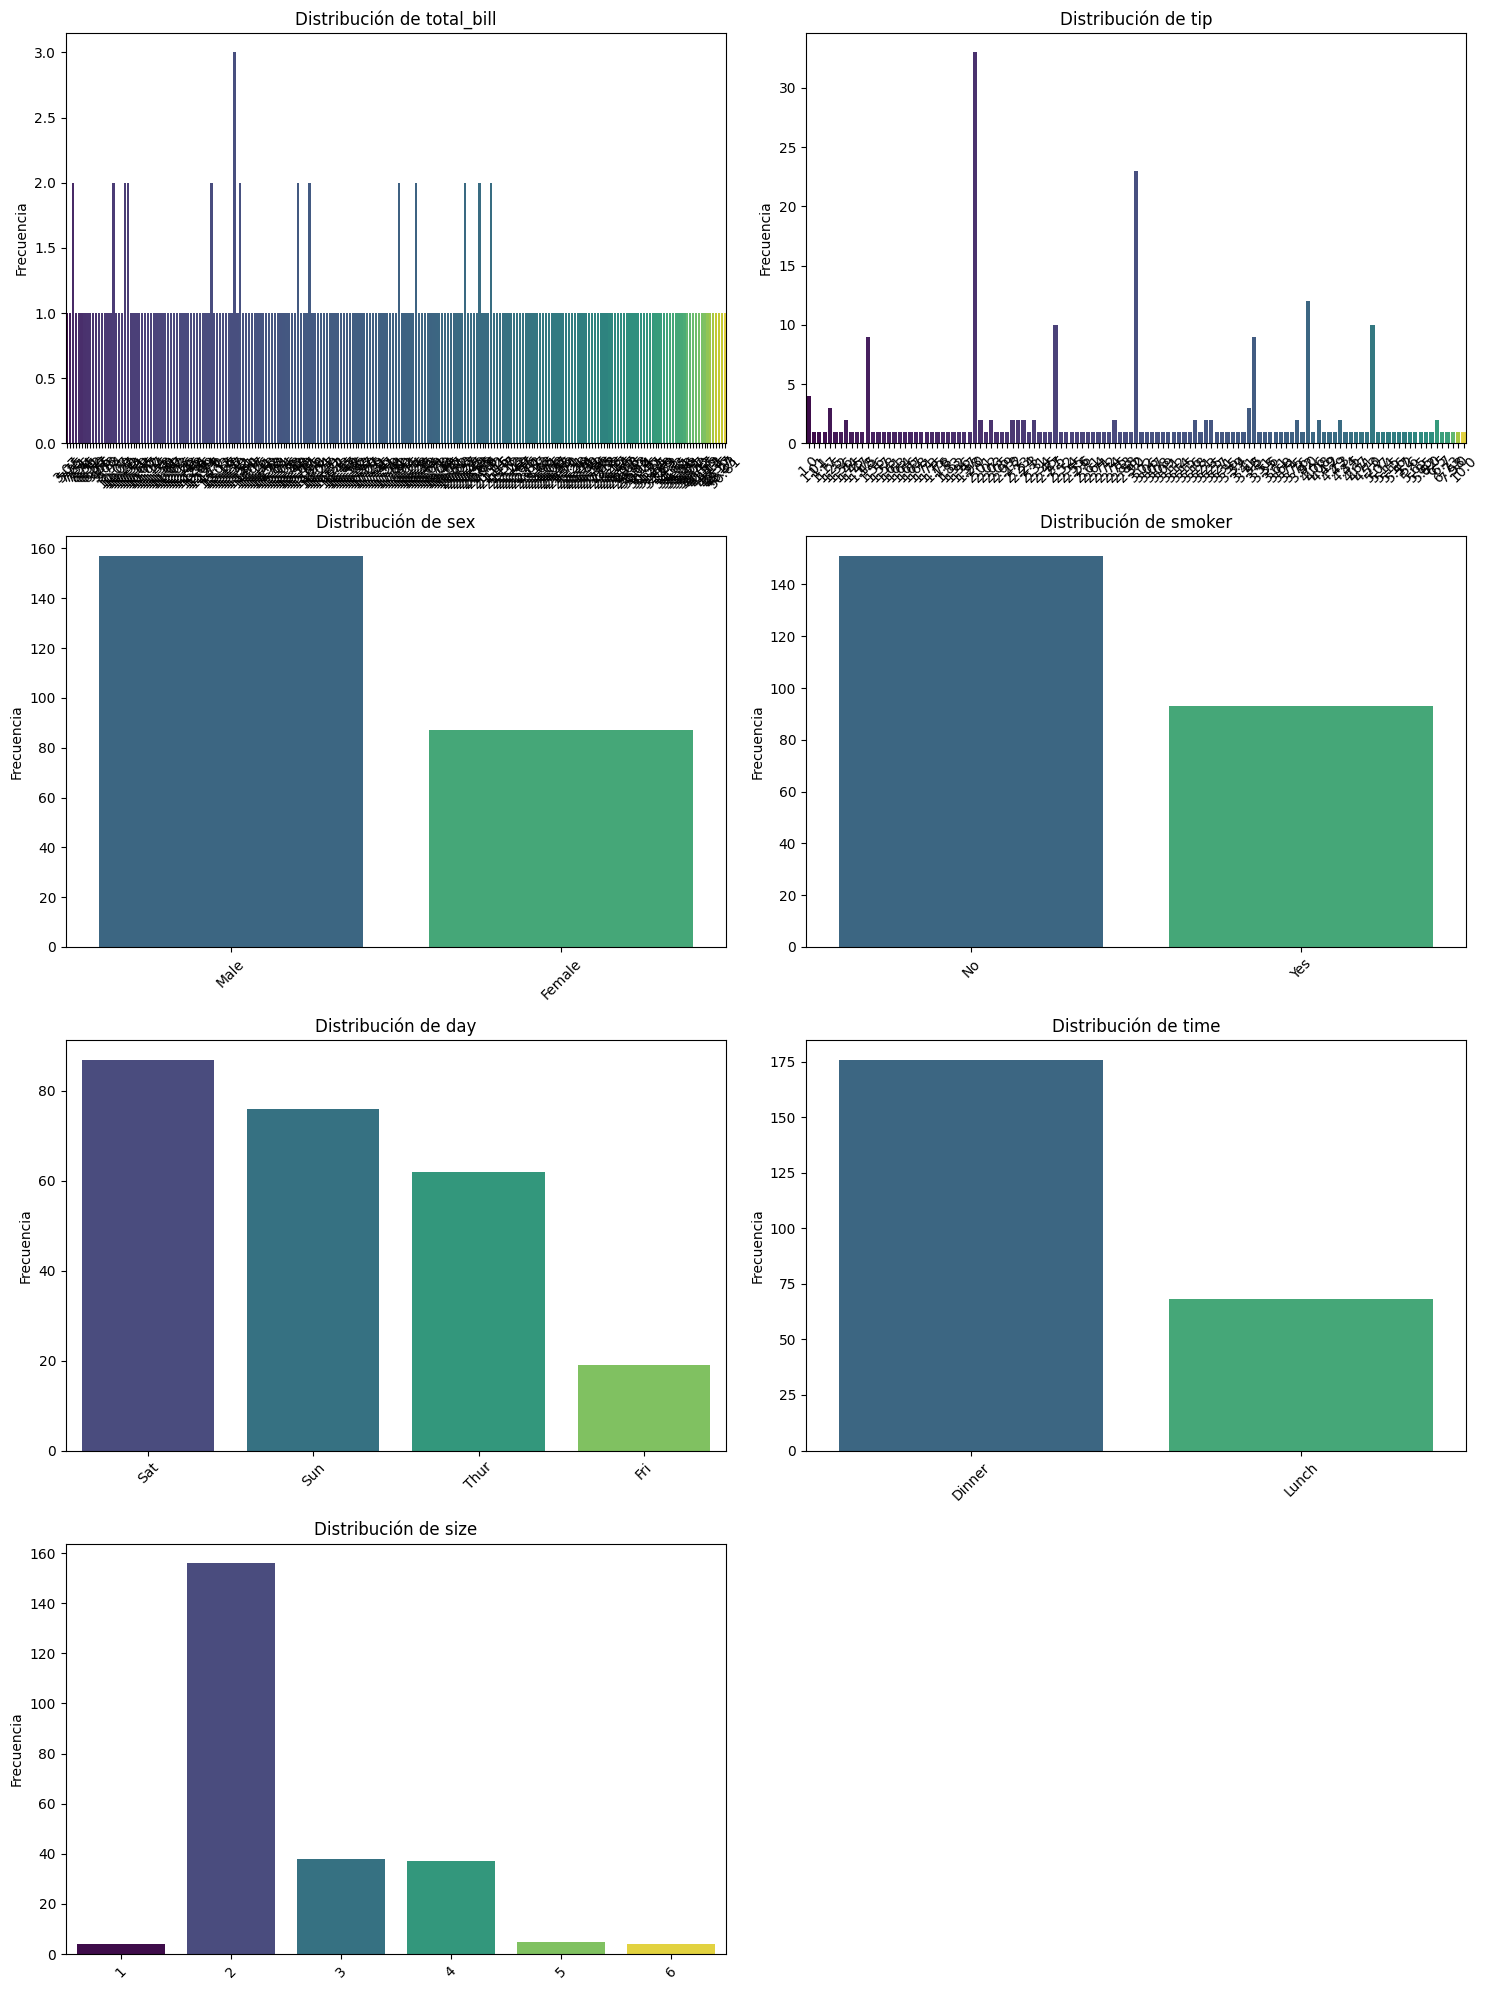

In [35]:
pinta_distribucion_categoricas(df_tips,df_tips_columnas)

### Ejercicio Extra #2:

Carga en un dataframe el dataset de los seguros que tanto conoces ya ("./data/Marketing-Customer-Analysis.csv") y analiza cual es el perfil típico del cliente de la compañía a partir de las variables categóricas siguientes: `education, state, employmentstatus, gender, marital_status, vehicle_class, vehicle_size`. (Nota: en el workout lo hicimos a partir de las modas de dichos valores, pero no es la forma "precisa" de hacerlo, piensa en la "moda" sí pero de la combinación de valores)
